In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,9)})
sns.set_context('talk')
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 2000)

## Collection

In [2]:
df = pd.read_csv('out/collection.csv')
df.id.count()

241

### Pricing overview - the most valuable records

In [3]:
df_plot = df.sort_values(by=['med'], ascending=False).head(100)

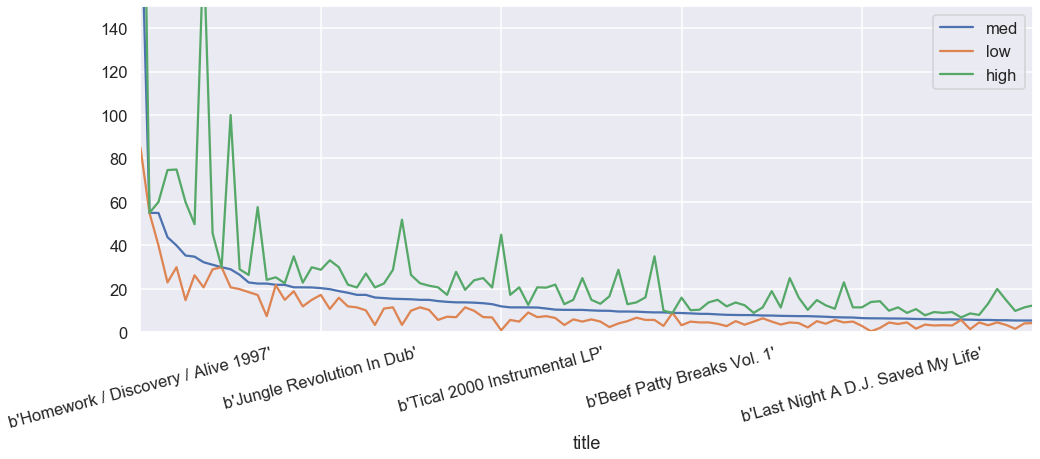

In [4]:
ax = df_plot[['title', 'med', 'low', 'high']].plot(kind='line', x='title', figsize=[16,6], ylim=(0,150))
plt.xticks(rotation=15)
plt.show()

In [5]:
df[['med', 'low', 'high']].sum()

med     1969.06
low     1154.43
high    3566.61
dtype: float64

### Low supply, high demand

In [6]:
df[(df['for_sale'] < 6) & (df['want'].astype(int) > 100)]

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
3,410546,b'Massive Motion',4.99,4.26,89,4.15,5.50,11.51,104,404,"Mar 6, 2021",2,https://www.discogs.com/release/410546
15,2261399,b'Witness (1 Hope)',9.96,4.63,57,4.14,9.61,28.81,383,541,"Mar 6, 2021",4,https://www.discogs.com/release/2261399
16,7724343,b'Jungle Revolution In Dub',24.53,4.76,38,17.29,20.38,28.82,280,537,"Mar 18, 2021",3,https://www.discogs.com/release/7724343
17,167732,b'Botchit Breaks 2',8.30,4.3,27,3.46,15.37,51.87,199,165,"Jan 1, 2021",2,https://www.discogs.com/release/167732
80,35433,b'Away',6.91,3.88,25,3.89,6.41,11.53,157,69,"Dec 5, 2020",3,https://www.discogs.com/release/35433
93,79117,b'Six Days',13.00,4.21,19,7.50,11.00,20.61,110,89,"Mar 8, 2021",2,https://www.discogs.com/release/79117
114,311765,b'Cyclone',9.00,4.46,127,4.28,7.50,16.00,304,656,"Apr 3, 2021",4,https://www.discogs.com/release/311765
128,445341,b'Adventures In Success',49.90,4.57,21,5.19,9.61,12.99,290,169,"Feb 23, 2021",1,https://www.discogs.com/release/445341
141,12066554,b'Heat',0.00,4.88,41,7.24,14.07,17.29,240,232,"Feb 20, 2021",0,https://www.discogs.com/release/12066554
179,266939,b'Rapture',9.90,4.29,14,3.20,6.00,9.37,145,101,"Feb 16, 2021",2,https://www.discogs.com/release/266939


### Rare records with high demand - prices higher than highest sale in history

In [7]:
df[(df['start'] > df['high']) & (df['want'].astype(int) > 100)]

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
128,445341,b'Adventures In Success',49.90,4.57,21,5.19,9.61,12.99,290,169,"Feb 23, 2021",1,https://www.discogs.com/release/445341
179,266939,b'Rapture',9.90,4.29,14,3.20,6.00,9.37,145,101,"Feb 16, 2021",2,https://www.discogs.com/release/266939
180,266939,b'Rapture',9.90,4.29,14,3.20,6.00,9.37,145,101,"Feb 16, 2021",2,https://www.discogs.com/release/266939
221,9056717,b'Outer Edges',80.68,4.69,62,40.00,54.95,60.00,297,295,"Mar 21, 2021",1,https://www.discogs.com/release/9056717


### Valuable records - history prices get more than 3 times median value

In [8]:
df[(3*df['med'] < df['high']) & (df['want'].astype(int) > 100)]

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
5,6424917,b'Alive 2007',45.00,4.65,648,20.71,32.30,177.77,2529,6115,"Apr 4, 2021",49,https://www.discogs.com/release/6424917
17,167732,b'Botchit Breaks 2',8.30,4.3,27,3.46,15.37,51.87,199,165,"Jan 1, 2021",2,https://www.discogs.com/release/167732
28,45346,b'Days Go By',1.73,4.1,96,1.15,2.99,10.00,223,766,"Apr 4, 2021",52,https://www.discogs.com/release/45346
36,654994,b'No Good / Horny Disco Balls',3.00,4.25,77,2.90,5.41,23.04,292,546,"Feb 10, 2021",7,https://www.discogs.com/release/654994
41,1058605,b'All Eyez On Me',24.06,4.59,1031,20.75,29.05,99.99,2958,10799,"Apr 11, 2021",64,https://www.discogs.com/release/1058605
91,40639,b'The Analogue Theatre',6.99,4.28,98,4.60,7.57,25.00,298,472,"Mar 12, 2021",12,https://www.discogs.com/release/40639
123,1508621,b'Tical 2000 Instrumental LP',6.64,4.17,12,0.99,12.00,44.95,111,83,"Nov 20, 2020",7,https://www.discogs.com/release/1508621
140,111311,b'Gangsta Gangsta / Dopeman (Drum & Bass Mixes)',1.82,4.23,56,2.48,4.99,15.18,158,465,"Mar 14, 2021",17,https://www.discogs.com/release/111311
147,189138,b'Watch Out Now',1.00,4.35,215,2.00,3.47,19.00,318,2125,"Mar 21, 2021",86,https://www.discogs.com/release/189138
163,181596,b'Hot In Herre',0.56,4.14,72,0.57,1.69,10.37,123,434,"Feb 16, 2021",21,https://www.discogs.com/release/181596


### High demand records - more people want than actually have these records

In [9]:
df.query('want>have').sort_values(by='want', ascending=False)

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
156,1676821,b'Atmosphere E.P. Vol. 1',9.96,4.74,91,6.77,9.56,13.84,684,493,"Jan 21, 2021",6,https://www.discogs.com/release/1676821
38,135212,b'Time To Shuff EP',8.30,4.32,66,3.46,16.07,20.70,535,274,"Jan 11, 2021",13,https://www.discogs.com/release/135212
110,10292,b'Freshglow EP',5.00,3.66,44,7.05,11.47,20.75,332,135,"Nov 13, 2020",6,https://www.discogs.com/release/10292
221,9056717,b'Outer Edges',80.68,4.69,62,40.00,54.95,60.00,297,295,"Mar 21, 2021",1,https://www.discogs.com/release/9056717
128,445341,b'Adventures In Success',49.90,4.57,21,5.19,9.61,12.99,290,169,"Feb 23, 2021",1,https://www.discogs.com/release/445341
141,12066554,b'Heat',0.00,4.88,41,7.24,14.07,17.29,240,232,"Feb 20, 2021",0,https://www.discogs.com/release/12066554
207,1550206,b'Jazz Note 1 / Burning',9.90,4.57,30,5.00,6.86,11.53,227,204,"Mar 13, 2021",3,https://www.discogs.com/release/1550206
40,153742,b'Tales From A Danceographic Ocean',3.60,4.75,36,6.90,13.00,20.64,221,161,"Dec 21, 2020",9,https://www.discogs.com/release/153742
92,5094444,b'Sugar Is Sweeter',2.50,4.38,24,2.98,5.00,10.49,207,162,"Feb 11, 2021",12,https://www.discogs.com/release/5094444
17,167732,b'Botchit Breaks 2',8.30,4.3,27,3.46,15.37,51.87,199,165,"Jan 1, 2021",2,https://www.discogs.com/release/167732
